# Import all useful Dependencies

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.express as px
import datetime

In [37]:
une_ind= pd.read_csv('Unemployment in India.csv')
une_11_2020=pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
une_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [38]:
une_ind.shape

(768, 7)

In [39]:
une_ind.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [40]:
une_ind.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [41]:
une_ind.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


# Correlation between the features of this dataset

C:\Users\Dell\AppData\Local\Temp\ipykernel_10180\1052046871.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
C:\Users\Dell\AppData\Local\Temp\ipykernel_10180\1052046871.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(une_ind.corr())


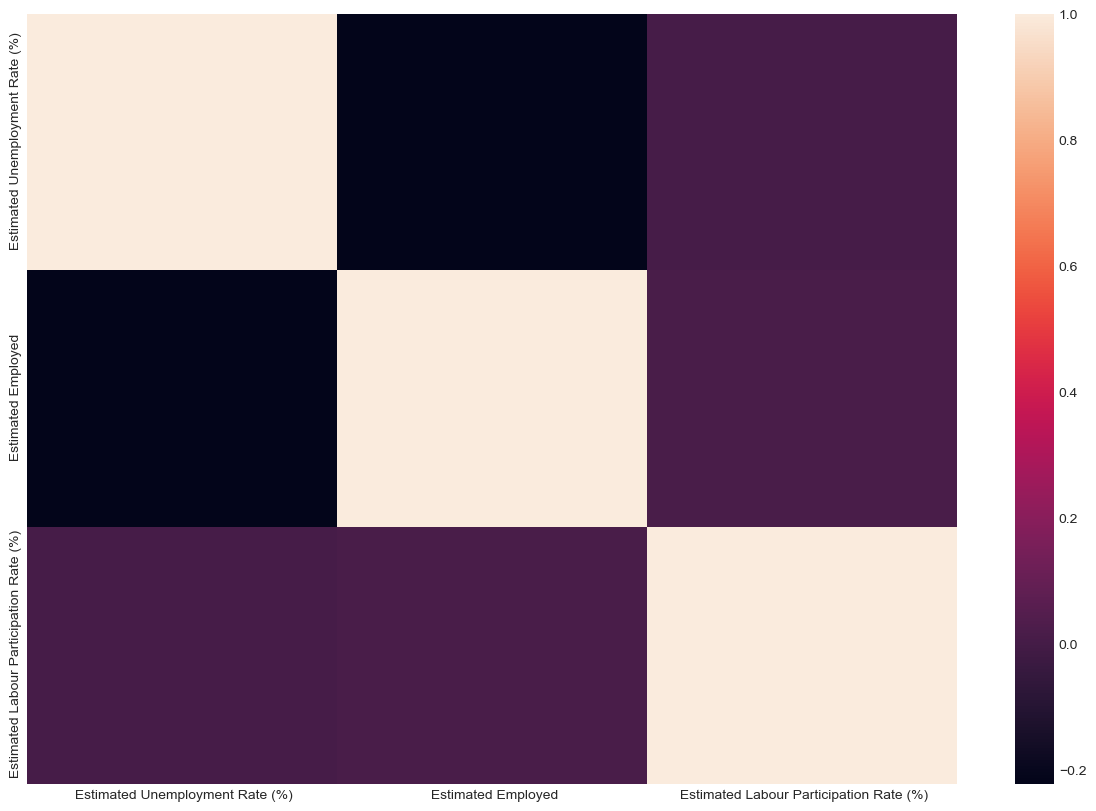

In [42]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15, 10))
sns.heatmap(une_ind.corr())
plt.show()

In [60]:
# Rename the col name by rename function
unemp = une_ind.rename(columns={une_ind.columns[0]:'State',une_ind.columns[1]:'Date',une_ind.columns[2]:'Frequency',
                                une_ind.columns[3]:'EUR',une_ind.columns[4]:'EE', une_ind.columns[5]:'ELPR', 
                                une_ind.columns[6]:'Region'})
unemp.head()

,State,Date,Frequency,EUR,EE,ELPR,Region
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [44]:
unemp["State"].value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: State, dtype: int64

In [45]:
unemp["Region"].value_counts()

Urban    381
Rural    359
Name: Region, dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_10180\864902378.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



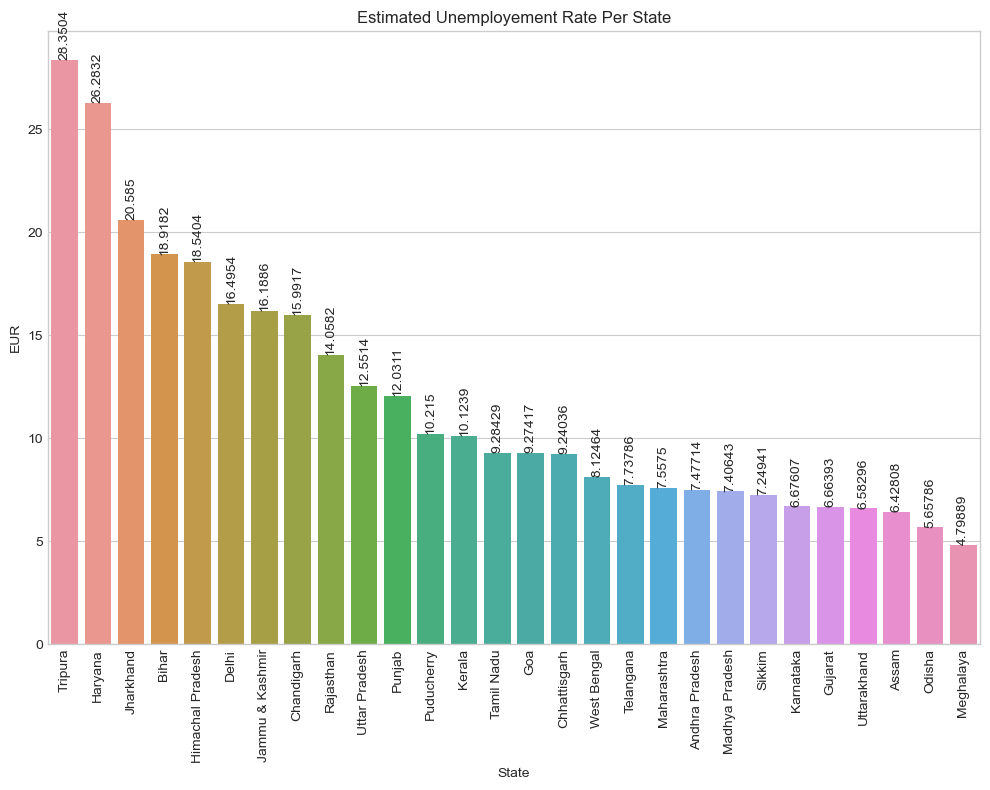

In [95]:
#visualize the unemployement rate statewise
gbStaEUR=unemp.groupby(["State"]).mean().reset_index()
gbStaEUR=gbStaEUR.sort_values("EUR", ascending=False) 
plt.figure(figsize=(10,8))
GB=sns.barplot(x="State",y="EUR", data=gbStaEUR)
for bar in GB.containers:
    plt.bar_label(bar, rotation=90)
plt.xticks(rotation=90)
plt.title("Estimated Unemployement Rate Per State")
plt.tight_layout()
plt.show()

In [64]:
unemp['Date']=pd.to_datetime(unemp['Date'])
unemp['day']=unemp['Date'].dt.day
unemp['month']=unemp['Date'].dt.month
unemp['year']=unemp['Date'].dt.year
dataY2019 = unemp[unemp['year'] == 2019]
dataY2020 = unemp[unemp['year'] == 2020]
region_sum_Y2019 = dataY2019.groupby('State')['EE'].sum().sort_values().reset_index()
region_sum_Y2020 = dataY2020.groupby('State')['EE'].sum().sort_values().reset_index()
# Here,create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=['2019', '2020'], shared_yaxes=True)
# Now,add bar plot for 2019
fig.add_trace(go.Bar(
    y=region_sum_Y2019['State'],
    x=dataY2019.groupby('State')['EE'].sum().sort_values().values,
    orientation='h',
    name='2019',
    marker=dict(color='blue', line=dict(color='black', width=1))
), row=1, col=1)
#Now,add bar plot for 2020
fig.add_trace(go.Bar(
    y=region_sum_Y2020['State'],
    x=dataY2020.groupby('State')['EE'].sum().sort_values().values,
    orientation='h',
    name='2020',
    marker=dict(color='green', line=dict(color='black', width=1))
), row=1, col=2)
# Update layout
fig.update_layout(
    height=700,
    width=1000,
    showlegend=False,
    title_text='Here, Distribution of Total Estimated Employed in 2019 v/s 2020 by State'
)
# Set x-axis and y-axis titles
fig.update_xaxes(title_text='Total Estimated Employed', row=1, col=1)
fig.update_xaxes(title_text='Total Estimated Employed', row=1, col=2)
fig.update_yaxes(title_text='State', row=1, col=1)
# Show the plot
fig.show()

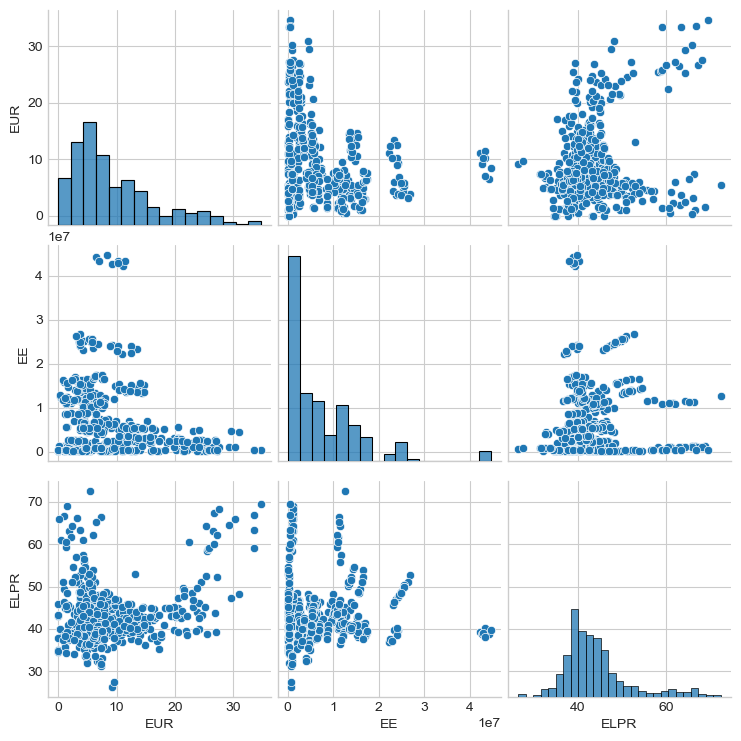

In [66]:
p_plot = dataY2019.drop(columns=['Date','day','month','year'])
sns.pairplot(p_plot)

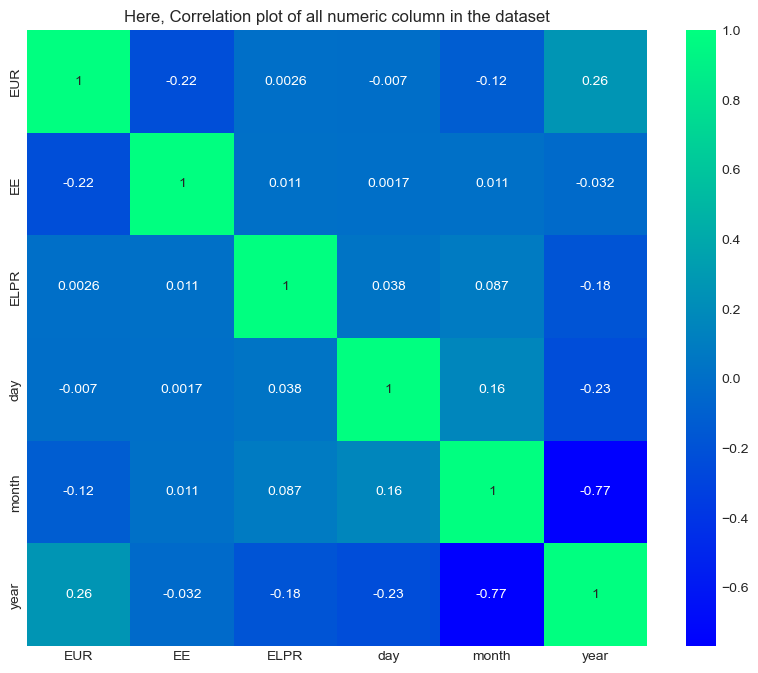

In [84]:
#visualize the correlation plot of numeric columns 
plt.figure(figsize=(10, 8))
sns.heatmap(unemp[unemp.select_dtypes (include=[int, float]).columns].corr(),annot=True, cmap="winter") 
plt.title("Here, Correlation plot of all numeric column in the dataset")
plt.show()

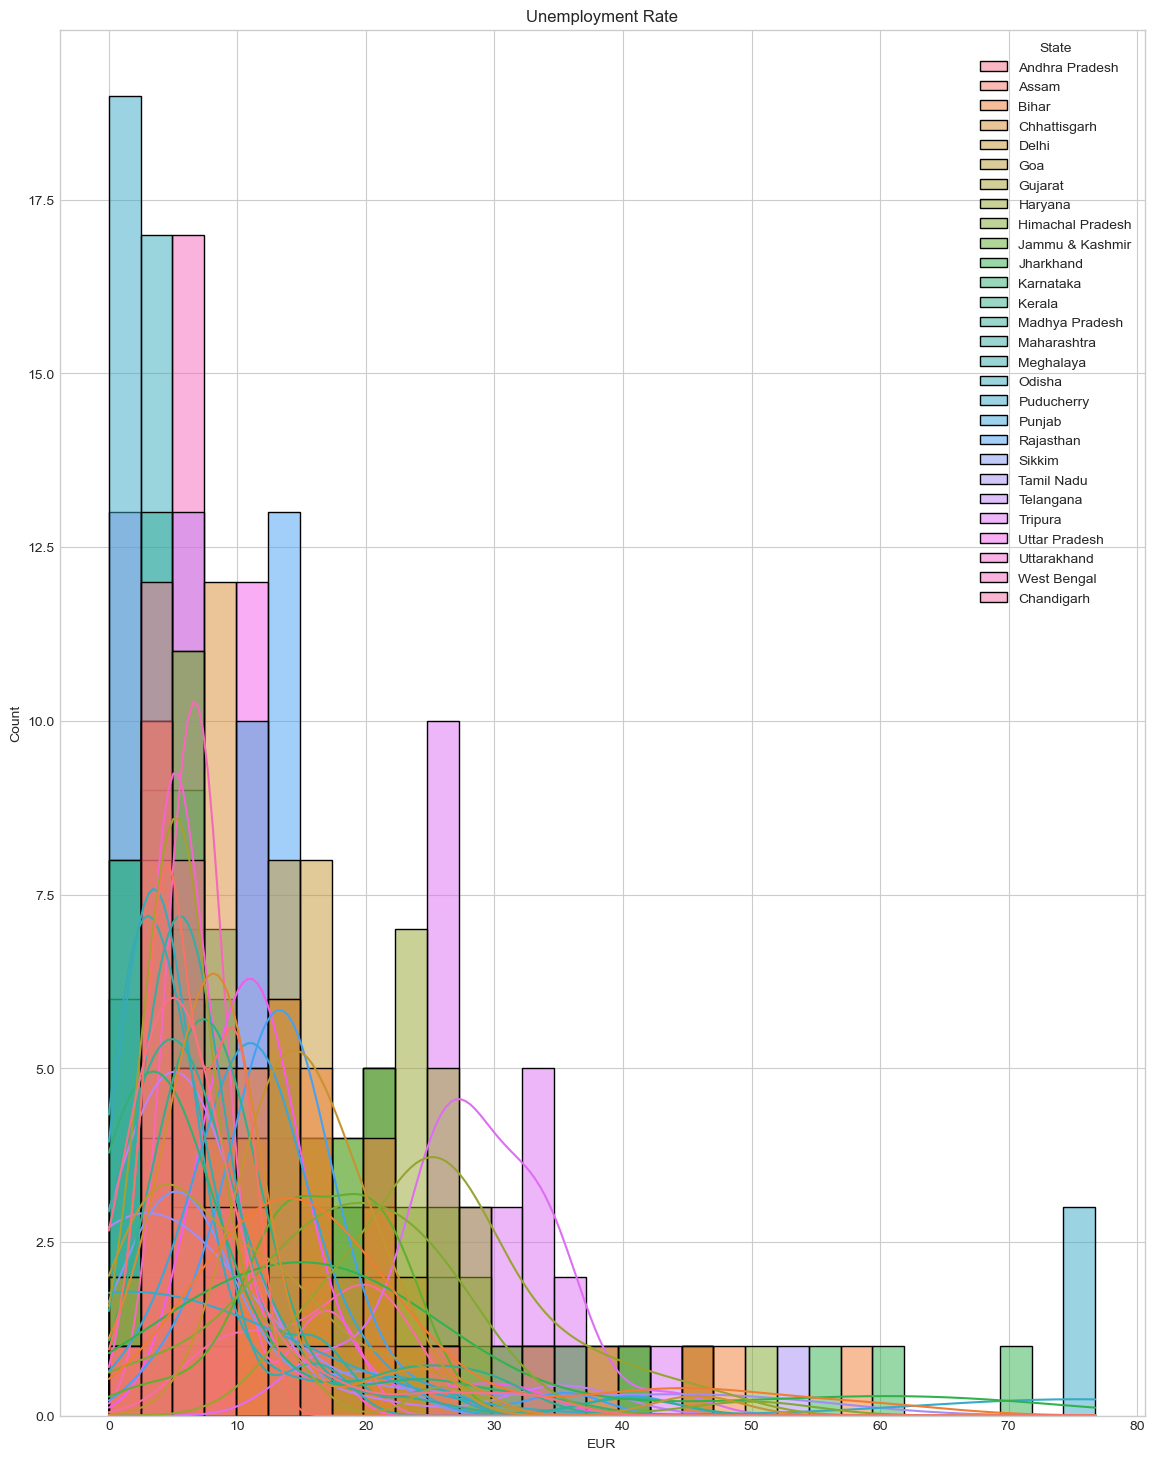

In [98]:
unemp.drop(columns=['date','day','month','year'])
plt.figure(figsize=(14, 18))
plt.title("Unemployment Rate")
sns.histplot(x="EUR", hue="State", data=unemp ,kde=True)
plt.show()

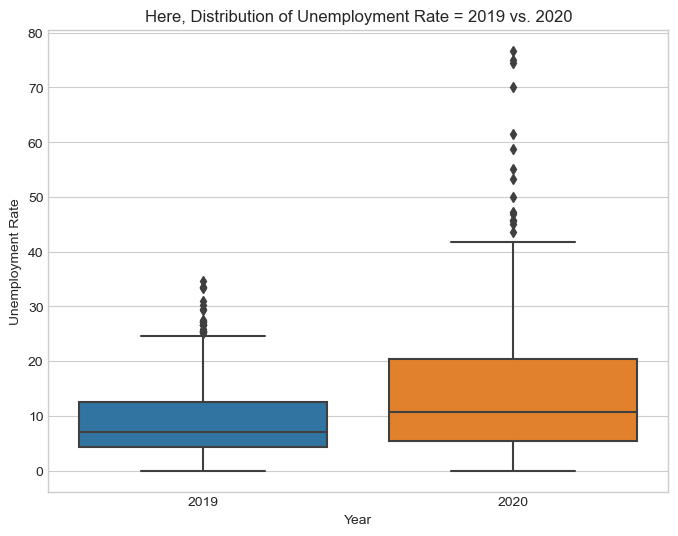

In [69]:
comb_data = pd.concat([dataY2019, dataY2020], ignore_index=True)
# Now, plot a box plot to compare the distribution of unemployment rates between the two years
plt.figure(figsize=(8, 6))
sns.boxplot(x=comb_data['Date'].dt.year, y=comb_data['EUR'])
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Here, Distribution of Unemployment Rate = 2019 vs. 2020')
plt.show()

In [102]:
fig=px.scatter_geo(unemp,color="Region",hover_name="State", size="EUR", 
            animation_frame="month", scope='asia', template='seaborn', title='Impack of lockdown on Employesent across regions')
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"]=2000
fig.update_geos(lataxis_range=[15,45], lonaxis_range=[65, 100],oceancolor="#3399FF", showocean=True)
fig.show()